In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
register_matplotlib_converters()

## Ice Cream Production Data

In [2]:
df_ice_cream=pd.read_csv('D:\Time series analysis\ice_cream.csv')

In [3]:
df_ice_cream.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [4]:
#remane colomns
df_ice_cream.rename(columns={'DATE':'date','IPN31152N':'production'},inplace=True)

In [5]:
#convert data colomn to datetime tupe
df_ice_cream['date']=pd.to_datetime(df_ice_cream.date)

In [6]:
#set date as index
df_ice_cream.set_index('date',inplace=True)

In [7]:
#just get a data from 2010 onwards
start_date=pd.to_datetime('2010-01-01')
df_ice_cream=df_ice_cream[start_date:]

In [8]:
df_ice_cream.head()

,production
date,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576


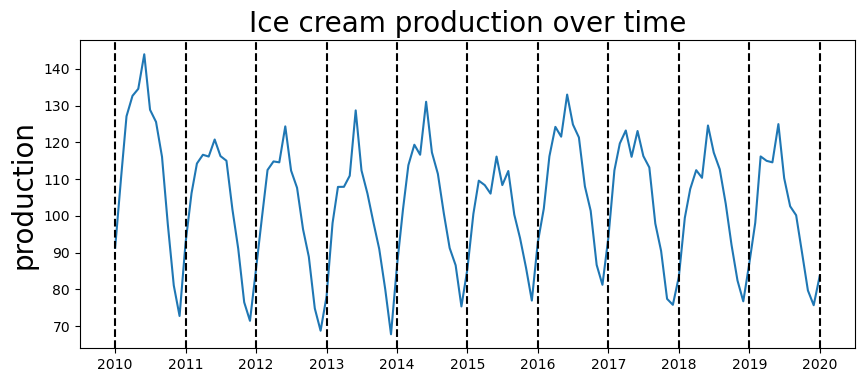

In [9]:
plt.figure(figsize=(10,4))
plt.plot(df_ice_cream.production)
plt.title('Ice cream production over time',fontsize=20)
plt.ylabel('production',fontsize=20)
for year in range(2010,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'),color='k',linestyle='--')

## ACF

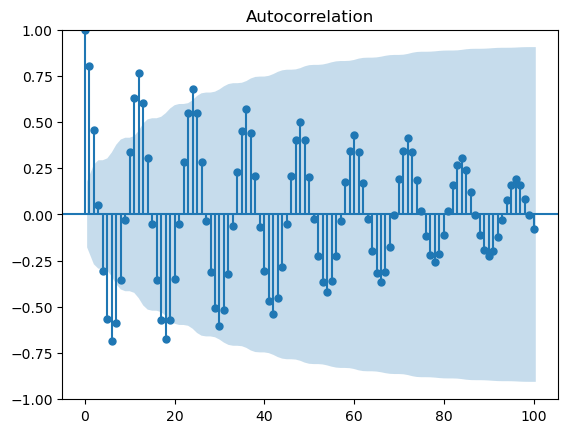

In [10]:
acf_plot=plot_acf(df_ice_cream.production,lags=100)

## Based on decaying ACF, we are likely dealing with an Auto Regressive process

## PACF

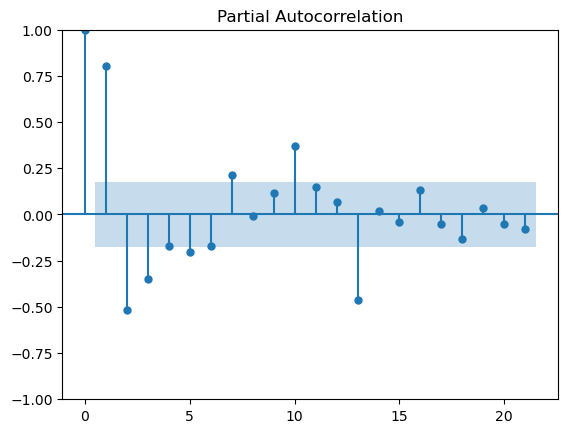

In [11]:
pacf_plot=plot_pacf(df_ice_cream.production)

##  Based on PACF,we should start with an Auto Regressive model with lags 1,2,3,10,13